## Codebook Part1, Named Entity Recognition and Sentiment Analysis
#### Team_05 
Neha Reddy Yenugu   
Saketh Kallepalli     
Ashritha Gugire

##### As said previously in our Abstract, this is our step two.
In this notebook we have done NER techniques to extract important entities such as 
album/song/lyric titles and artist names from the dataset.  
Finally analyzed user sentiments/ratings for each artist towards 
specific song or lyric.
Performed Grid Search Using Logistic Regression and Support Vector Classifiers.

#### I have changed the dataset folder names in zip file, so kindly while testing my code see thorugh that.
In detail comments and explanation with conclusion can be seen in below code for understandings.s 

In [11]:
import pandas as pd
import spacy

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

In [12]:
## This is dataset from Codebook one used here.
df_lyrics = pd.read_csv("C:\\Users\\ashri\\Documents\\AIT-526\\Final dataset\\music.csv")

In [13]:
# Function to extract entities and filter for specific types
def extract_filtered_entities(text):
    doc = nlp(text)
    # Filtering for PERSON, ORG, PRODUCT which might relate to artist names, 
    # brands, or works like albums and song titles
    return [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'PRODUCT']]

In [14]:
# Apply NER to the lyrics column
df_lyrics['named_entities'] = df_lyrics['music_lyric'].iloc[:200].apply(extract_filtered_entities)

# Display the DataFrame to see the entities
print(df_lyrics[['song_name', 'named_entities']])

                                                song_name  \
0                                        Careless Whisper   
1       Could You Be Loved / Citação Musical do Rap: S...   
2                                  Cruisin' (Part. Saulo)   
3                                                    Easy   
4                       For Your Babies (The Voice cover)   
...                                                   ...   
191297                                Trains Of No Return   
191298                 Vision Thing (canadian Club Remix)   
191299           When You Don't See Me German Release 447   
191300                                           Ya Ba Ye   
191301                                                You   

                                           named_entities  
0                                                      []  
1       [(ligue ternura ligue amor ligue ternura ligue...  
2                                                      []  
3                          

In [15]:
## this was our original dataset were we used in the beginning of the codebook 1, we are using here to extract the popularity column from that and adding to the above dataset
df_original = pd.read_csv("C:\\Users\\ashri\\Documents\\AIT-526\\musicgenre\\artists-data.csv")

In [16]:
# Create a dictionary mapping artist IDs to ratings from the original dataset
rating_mapping = dict(zip(df_original['Link'],df_original['Popularity']))

# Add the ratings column to the cleaned dataset based on the mapping
df_lyrics['popularity'] = df_lyrics['artist_id'].map(rating_mapping)


In [17]:
df_lyrics.head(20)

sno         artist_id                                          song_name  \
0     0   /ivete-sangalo/                                   Careless Whisper   
1     1   /ivete-sangalo/  Could You Be Loved / Citação Musical do Rap: S...   
2     2   /ivete-sangalo/                             Cruisin' (Part. Saulo)   
3     3   /ivete-sangalo/                                               Easy   
4     4   /ivete-sangalo/                  For Your Babies (The Voice cover)   
5     5   /ivete-sangalo/                                       Human Nature   
6     6   /ivete-sangalo/     Losing Control (Miss Cady feat. Ivete Sangalo)   
7     7   /ivete-sangalo/                           Master Blaster (Jammin')   
8     8   /ivete-sangalo/                                    More Than Words   
9     9   /ivete-sangalo/                                     Natural Collie   
10   10   /ivete-sangalo/              Where It Begins (feat. Nelly Furtado)   
11   11  /claudia-leitte/                                            Bandera   
12   12  /claudia-leitte/                           Carnaval (Feat. Pitbull)   
13   13  /claudia-leitte/                                     Circle Of Life   
14   14  /claudia-leitte/                                     It Hurt So Bad   
15   15  /claudia-leitte/                                        Lazy Groove   
16   16  /claudia-leitte/                               Shiver Down My Spine   
17   17  /claudia-leitte/                                              Signs   
18   18  /claudia-leitte/                                    Time after Time   
19   19  /claudia-leitte/                               We Are One (Ole Ola)   

                                           song_lyric  rock  pop  romântico  \
0   I feel so unsure\nAs I take your hand and lead...     0    1          1   
1   Don't let them fool, ya\nOr even try to school...     0    1          1   
2   Baby, let's cruise, away from here\nDon't be c...     0    1          1   
3   Know it sounds funny\nBut, I just can't stand ...     0    1          1   
4   You've got that look again\nThe one I hoped I ...     0    1          1   
5   Looking out\nAcross the night time\nThe city w...     0    1          1   
6   Uh, yeah.\nGo, go, go.\nUh, yeah.\nUh, Uh, Uhh...     0    1          1   
7   Everyone's feeling pretty\nIt's hotter than Ju...     0    1          1   
8   Saying 'I Love you'\nIs not the words I want t...     0    1          1   
9   Been down in the valley\nSmoking natural colli...     0    1          1   
10  When you're alone and you don't know how,\nTo ...     0    1          1   
11  If all that you have is money\n(You don't real...     0    1          1   
12  This is my carnaval aye aye aye ha\n(Mr. World...     0    1          1   
13  From the day we arrive on the planet\nAnd blin...     0    1          1   
14  I miss the arms that used to hold me\nThe tend...     0    1          1   
15  Are you ready to dance?\nTo make your body cra...     0    1          1   
16  We're going too fast\nBut I don't care about t...     0    1          1   
17  I'm lying alone on the floor\nWith a feather I...     0    1          1   
18  Lying in my bed I hear the clock tick\nAnd thi...     0    1          1   
19  Put your flags up in the sky (put them in the ...     0    1          1   

    gospel/religioso  pop/rock  hip hop  ...  indie  mpb  dance  \
0                  0         0        0  ...      0    0      0   
1                  0         0        0  ...      0    0      0   
2                  0         0        0  ...      0    0      0   
3                  0         0        0  ...      0    0      0   
4                  0         0        0  ...      0    0      0   
5                  0         0        0  ...      0    0      0   
6                  0         0        0  ...      0    0      0   
7                  0         0        0  ...      0    0      0   
8                  0         0        0  ...      0    0    

In [18]:
## In the above dataset, when we saved it to our system it was directly saving with an extra unnamed column so we wish to remove it by manually renaming it as "sno"
df_lyrics.drop(columns = ['sno'], inplace = True)

In [19]:
from collections import Counter
#Flatten the list of entities and create a counter for all entity types and texts
all_entities = [entity for sublist in df_lyrics['named_entities'].dropna() for entity in sublist]
entity_types = [entity[1] for entity in all_entities]
entity_texts = [entity[0] for entity in all_entities]

In [20]:
type_counts = Counter(entity_types)
text_counts = Counter(entity_texts)

In [21]:
# Convert counters to DataFrames for easier plotting
df_type_counts = pd.DataFrame(type_counts.items(), columns=['Entity Type', 'Frequency'])
df_text_counts = pd.DataFrame(text_counts.items(), columns=['Entity Text', 'Frequency'])

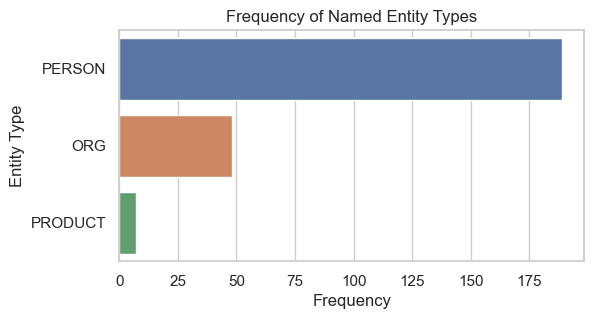

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting entity type frequencies
plt.figure(figsize=(6, 3))
sns.barplot(x='Frequency', y='Entity Type', data=df_type_counts.sort_values(by='Frequency', ascending=False))
plt.title('Frequency of Named Entity Types')
plt.xlabel('Frequency')
plt.ylabel('Entity Type')
plt.show()


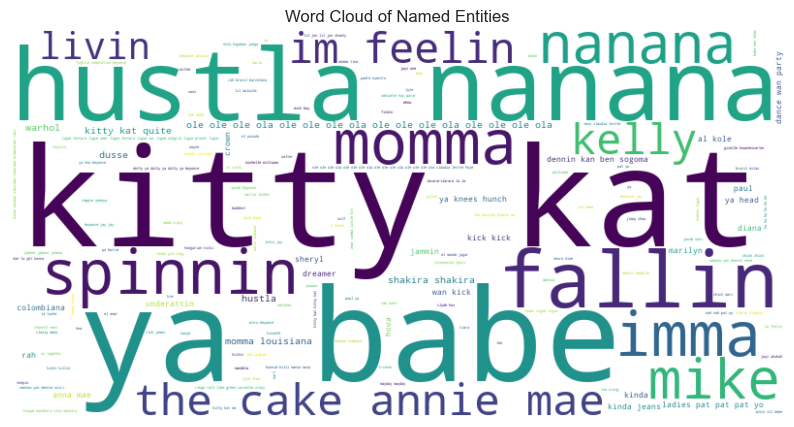

In [24]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text_counts)

# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Named Entities')
plt.show()


Above,data comprises lyrics and information about artists, including their popularity. From these lyrics, we've extracted and filtered entities, focusing on those categorized as PERSON, ORG, and PRODUCT. These categories typically encompass artist names, organizations, or album/song titles. 

By analyzing the named entities extracted from the lyrics of the initial 200 songs, we've compiled a comprehensive list of entity types and texts. This process involves tallying the occurrences of each entity type and text across all songs, enabling us to identify the most frequently mentioned entities in the lyrics.

In [25]:
## in here we decided to map categorical values corresponding to the popularity column as follows.
emotions_dict = {
    (1.0, 2.0): "least liked",
    (2.0, 3.0): "not bad",
    (3,0, 4.0): "liked",
    (4.0, float('inf')): "most liked"
} 

# Function to map rating to emotion
def map(rating):
    for rating_range, emotion in emotions_dict.items():
        if rating_range[0] <= rating < rating_range[1]:
            return emotion

# Map rating column to emotion
df_lyrics['ratings'] = df_lyrics['popularity'].map(map)

In [26]:
df_lyrics.head()

artist_id                                          song_name  \
0  /ivete-sangalo/                                   Careless Whisper   
1  /ivete-sangalo/  Could You Be Loved / Citação Musical do Rap: S...   
2  /ivete-sangalo/                             Cruisin' (Part. Saulo)   
3  /ivete-sangalo/                                               Easy   
4  /ivete-sangalo/                  For Your Babies (The Voice cover)   

                                          song_lyric  rock  pop  romântico  \
0  I feel so unsure\nAs I take your hand and lead...     0    1          1   
1  Don't let them fool, ya\nOr even try to school...     0    1          1   
2  Baby, let's cruise, away from here\nDon't be c...     0    1          1   
3  Know it sounds funny\nBut, I just can't stand ...     0    1          1   
4  You've got that look again\nThe one I hoped I ...     0    1          1   

   gospel/religioso  pop/rock  hip hop  rap  ...  mpb  dance  trilha sonora  \
0                 0         0        0    0  ...    0      0              0   
1                 0         0        0    0  ...    0      0              0   
2                 0         0        0    0  ...    0      0              0   
3                 0         0        0    0  ...    0      0              0   
4                 0         0        0    0  ...    0      0              0   

   heavy metal  electronica  axé  \
0            0            0    1   
1            0            0    1   
2            0            0    1   
3            0            0    1   
4            0            0    1   

                                         music_lyric  \
0  i feel so unsure i take your hand and lead you...   
1  dont let them fool ya or even try to school ya...   
2  baby lets cruise away from here dont be confus...   
3  know it sounds funny but i just cant stand the...   
4  youve got that look again the one i hoped i ha...   

                                      named_entities popularity     ratings  
0                                                 []        4.4  most liked  
1  [(ligue ternura ligue amor ligue ternura ligue...        4.4  most liked  
2                                                 []        4.4  most liked  
3                                                 []        4.4  most liked  
4                                                 []        4.4  most liked  

[5 rows x 22 columns]

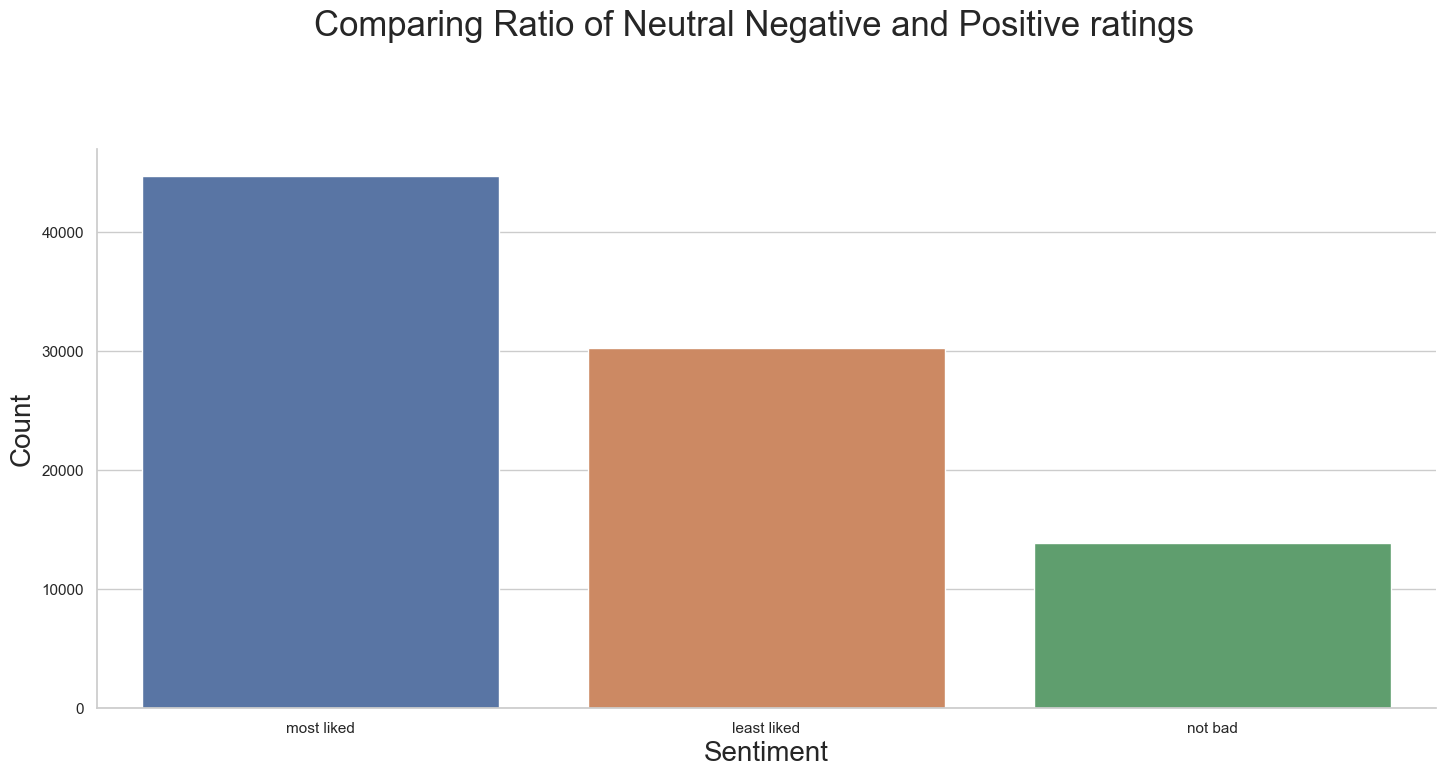

In [27]:
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive ratings", fontsize = 25)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "ratings", data = df_lyrics)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [28]:
## Percentage of each sentiment class
def pert_count(data, category):
    return (len(data[data["ratings"] == category])/len(data)) * 100
print(f"Percentage of neutral words in train --> {pert_count(df_lyrics, 'not bad')} %")
print(f"Percentage of negative words in train --> {pert_count(df_lyrics, 'least liked')} %")
print(f"Percentage of positive words in train --> {pert_count(df_lyrics, 'most liked')} %")

Percentage of neutral words in train --> 7.240384313807488 %
Percentage of negative words in train --> 15.842489885103136 %
Percentage of positive words in train --> 23.40644635184159 %


In [29]:
from nltk.corpus import stopwords
from spacy.lang.pt.stop_words import STOP_WORDS
stopwords = set(STOP_WORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [30]:
neu=df_lyrics[df_lyrics["ratings"] == "not bad"]["music_lyric"]
neg=df_lyrics[df_lyrics["ratings"] == "least liked"]["music_lyric"]
pos=df_lyrics[df_lyrics["ratings"] == "most liked"]["music_lyric"]

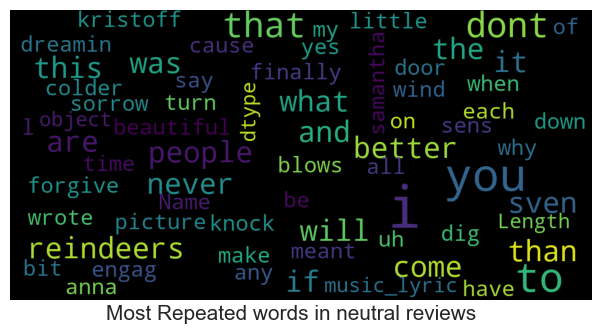

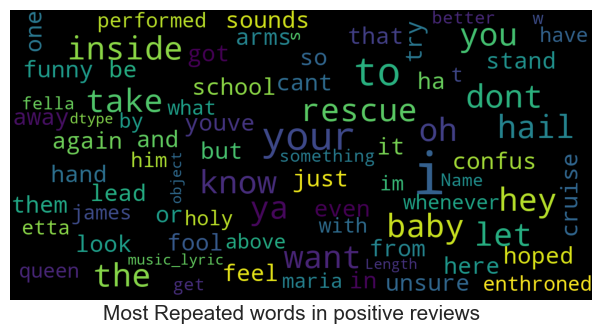

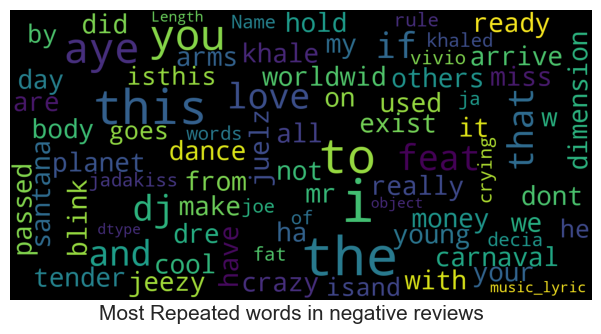

In [31]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

In [32]:
neu_artist=df_lyrics[df_lyrics["ratings"] == "not bad"]["artist_id"]
neg_artist=df_lyrics[df_lyrics["ratings"] == "least liked"]["artist_id"]
pos_artist=df_lyrics[df_lyrics["ratings"] == "most liked"]["artist_id"]

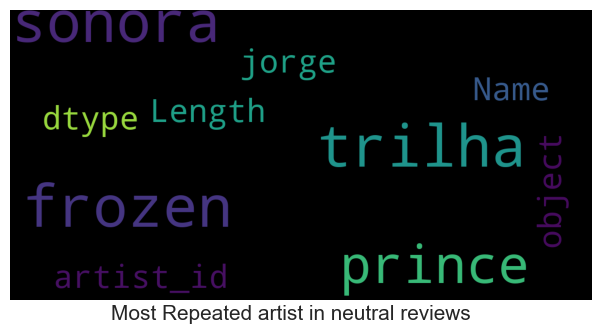

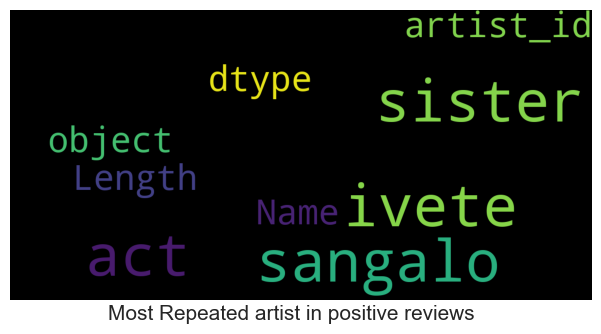

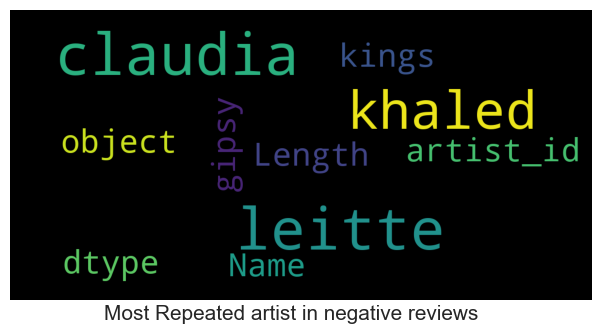

In [33]:
word_cloud(neu_artist, "Most Repeated artist in neutral reviews")
word_cloud(pos_artist, "Most Repeated artist in positive reviews")
word_cloud(neg_artist, "Most Repeated artist in negative reviews")

From all the above,We created a visual representation of the data using a word cloud of named entities. Moreover, we developed a custom dictionary associating emotions with the popularity ratings. Our analysis revealed a significant proportion of highly-rated songs, followed by those with lower ratings and a neutral sentiment. Specifically, positive ratings accounted for 23%, negative ratings for 15%, and neutral ratings for 7% of the total.

When examining the most commonly occurring words in the lyrics, we noted terms like "Baby," "queen," and "holy" in lyrics with positive ratings, while words such as "young," "love," and "crazy" were prevalent in lyrics with negative ratings. Notably, artists such as Ivete Sangalo and Claudia Leitte Khaled were frequently mentioned in connection with negative ratings.

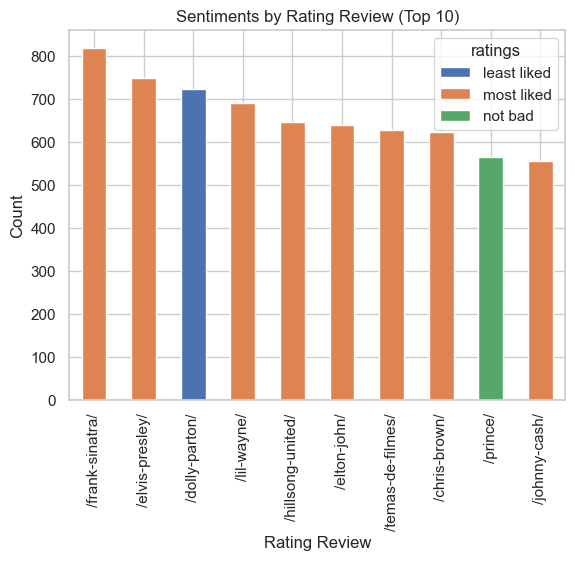

In [34]:
# Group the data by 'ALink', 'sentiments', and count the occurrences
grouped = df_lyrics.groupby(['artist_id', 'ratings']).size().unstack(fill_value=0)

# Sum the occurrences for each 'ALink' (rating_review) and sort the results
grouped['Total'] = grouped.sum(axis=1)
sorted_grouped = grouped.sort_values(by='Total', ascending=False)

# Select the top five categories for plotting
top_five = sorted_grouped.head(10)

# Plot the data as a stacked bar plot
top_five.drop(columns='Total').plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Rating Review')
plt.ylabel('Count')
plt.title('Sentiments by Rating Review (Top 10)')
plt.show()

In [35]:
df_lyrics.dropna(subset='ratings', inplace=True)

## Model Optimization by Grid search

###  Grid search for the Logistic Regression model to optimize its hyperparameters

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [37]:
# Create a pipeline with TF-IDF vectorizer and logistic regression model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(sublinear_tf=True)),
    ('clf', LogisticRegression(solver='liblinear')),
])


In [38]:
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_features': [3000, 4000],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}


In [39]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2)

In [40]:
# Example using a placeholder 'lyrics' and 'labels' column
X = df_lyrics['music_lyric']  # Features (lyrics)
y = df_lyrics['ratings']  # Target (ratings)

grid_search.fit(X, y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END clf__C=0.1, clf__penalty=l1, tfidf__max_features=3000, tfidf__ngram_range=(1, 1); total time=  16.4s
[CV] END clf__C=0.1, clf__penalty=l1, tfidf__max_features=3000, tfidf__ngram_range=(1, 1); total time=  16.0s
[CV] END clf__C=0.1, clf__penalty=l1, tfidf__max_features=3000, tfidf__ngram_range=(1, 1); total time=  17.0s
[CV] END clf__C=0.1, clf__penalty=l1, tfidf__max_features=3000, tfidf__ngram_range=(1, 1); total time=  27.9s
[CV] END clf__C=0.1, clf__penalty=l1, tfidf__max_features=3000, tfidf__ngram_range=(1, 1); total time=  32.1s
[CV] END clf__C=0.1, clf__penalty=l1, tfidf__max_features=3000, tfidf__ngram_range=(1, 2); total time= 1.3min
[CV] END clf__C=0.1, clf__penalty=l1, tfidf__max_features=3000, tfidf__ngram_range=(1, 2); total time= 1.4min
[CV] END clf__C=0.1, clf__penalty=l1, tfidf__max_features=3000, tfidf__ngram_range=(1, 2); total time= 1.4min
[CV] END clf__C=0.1, clf__penalty=l1, tfidf__max_features=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(sublinear_tf=True)),
                                       ('clf',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'clf__C': [0.1, 1, 10], 'clf__penalty': ['l1', 'l2'],
                         'tfidf__max_features': [3000, 4000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [41]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


Best score: 0.488
Best parameters set:
	clf__C: 0.1
	clf__penalty: 'l1'
	tfidf__max_features: 4000
	tfidf__ngram_range: (1, 2)


In [42]:
df_lyrics['final']=df_lyrics['artist_id']+' '+df_lyrics['song_name']+' '+df_lyrics['music_lyric']

In [43]:
for column in df_lyrics.columns:
    # Check if any value in the column is None
    if df_lyrics[column].dtype == 'O' and df_lyrics[column].apply(lambda x: x is None).any():
        print(f"Column '{column}' contains None values.")

In [44]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(df_lyrics,df_lyrics['ratings'])

In [45]:
#Using TF-IDF to vectorize the lyrics of the training and testing dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

tfid = TfidfVectorizer(
                    ngram_range = (1,1),
                    sublinear_tf = True,
                    max_features=4000)

train_tfid = tfid.fit_transform(Xtrain['final'])
test_tfid = tfid.transform(Xtest['final'])

In [46]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [47]:
acc={'SVC':0,}

In [48]:
svc = LinearSVC()
svc.fit(train_tfid, Ytrain)
yhat1 = svc.predict(test_tfid)
acc['SVC']=accuracy_score(Ytest, yhat1)
print('Support Vector Classification = ',acc['SVC'])


Support Vector Classification =  0.753665557254655


###  Conclusion
Through this project, a comprehensive NLP analysis was performed to understand the sentiments associated with different music artists. By using NLP to process song lyrics and sentiment ratings, the study was able to visualize sentiment distributions across artists and optimize a sentiment analysis model. The application of grid search for hyperparameter tuning in logistic regression proved to be an effective strategy for enhancing model performance, though the accuracy indicates there is room for improvement. The results obtained can provide actionable insights for music recommendation systems and contribute to a more nuanced understanding of sentiment in musical content.

For further model improvement, considerations could be made for more complex models, additional features beyond TF-IDF vectorization, or deeper tuning of model hyperparameters. Additionally, other metrics beyond accuracy, such as precision, recall, and F1 score, could provide a more rounded evaluation of the model's performance, especially in imbalanced datasets where certain sentiment categories are underrepresented.